# Debates about increasing minimum wage in the Netherlands

(Last updated: Jun 12, 2024)


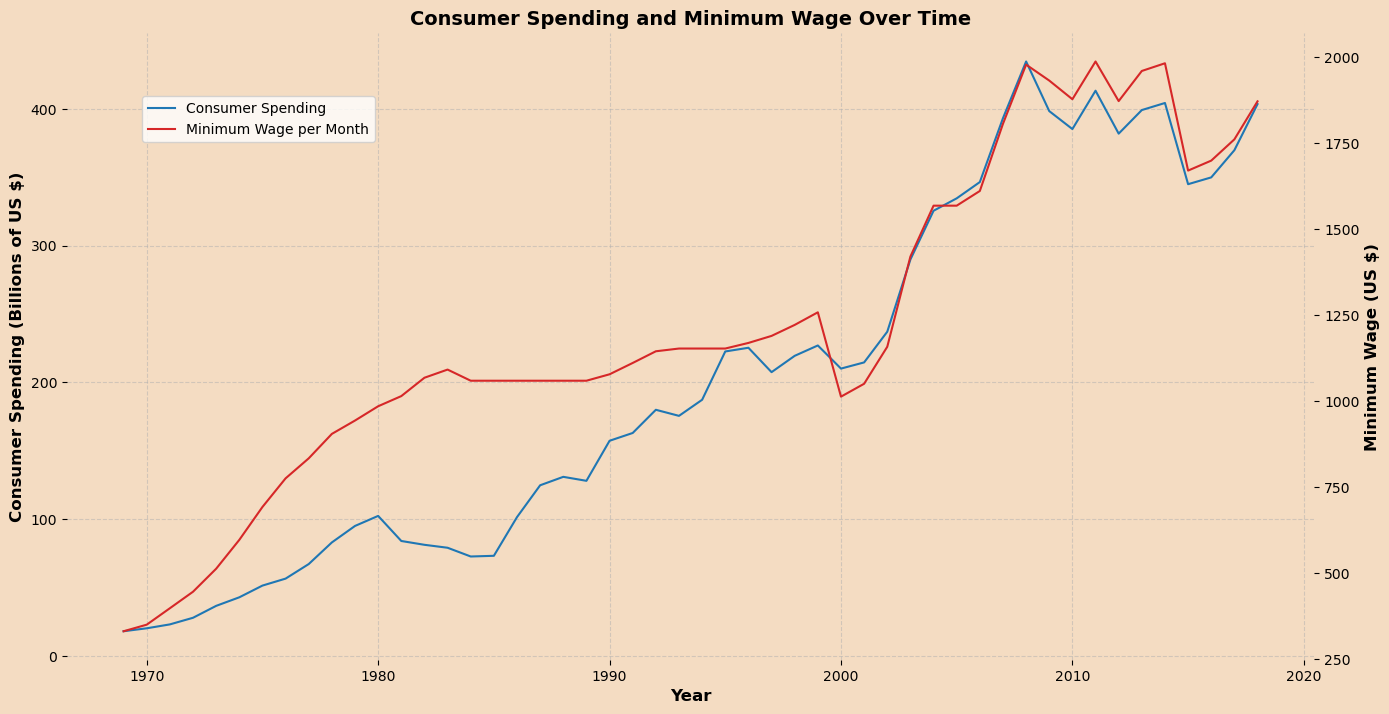

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
#Exchange rates from euros to dollars for each year Source : https://www.macrotrends.net/2548/euro-dollar-exchange-rate-historical-chart

exchange_rates = {
1969: 1.1747, 1970: 1.1747, 1971: 1.1747, 1972: 1.1747, 1973: 1.1747, 1974: 1.1747, 1975: 1.1747,
1976: 1.1747, 1977: 1.1747, 1978: 1.1747, 1979: 1.1747, 1980: 1.1747, 1981: 1.1747, 1982: 1.1747,
1983: 1.1747, 1984: 1.1747, 1985: 1.1747, 1986: 1.1747, 1987: 1.1747, 1988: 1.1747, 1989: 1.1747,
1990: 1.1747, 1991: 1.1747, 1992: 1.1747, 1993: 1.1747, 1994: 1.1747, 1995: 1.1747, 1996: 1.1747,
1997: 1.1747, 1998: 1.1747, 1999: 1.1747, 2000: 0.92, 2001: 0.90, 2002: 0.95, 2003: 1.13, 2004: 1.24,
2005: 1.24, 2006: 1.26, 2007: 1.38, 2008: 1.47, 2009: 1.39, 2010: 1.33, 2011: 1.39, 2012: 1.29,
2013: 1.33, 2014: 1.33, 2015: 1.11, 2016: 1.11, 2017: 1.13, 2018: 1.18
}

def convert_euro_to_dollar(year, amount_euro):
    return amount_euro * exchange_rates.get(year, 1)

def plot_consumer_spending_and_minimum_wage():
    minimum_wage_df = pd.read_csv("minimum_wage_data.csv")
    consumer_spending_df = pd.read_csv("netherlands-consumer-spending.csv")

    consumer_spending_df['year'] = consumer_spending_df['year'].str[:4]
    minimum_wage_df['year'] = minimum_wage_df['year'].astype(int)
    consumer_spending_df['year'] = consumer_spending_df['year'].astype(int)

    minimum_wage_df['minimum wage per month (dollar)'] = minimum_wage_df.apply(
        lambda row: convert_euro_to_dollar(row['year'], row['minimum wage per month (euro)']), axis=1
    )

    merged_df = pd.merge(consumer_spending_df, minimum_wage_df, on='year')

    fig, ax1 = plt.subplots(figsize=(14, 7))

    fig.patch.set_facecolor('#f4dcc2')
    ax1.set_facecolor('#f4dcc2')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)

    ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Consumer Spending (Billions of US $)', color='black', fontsize=12, fontweight='bold')
    ax1.plot(merged_df['year'], merged_df[' Billions of US $'], color='tab:blue', label='Consumer Spending')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.tick_params(axis='x', colors='black')
    
    ax1.grid(True, linestyle='--', alpha=0.5)
    
    ax2 = ax1.twinx()
    ax2.set_facecolor('#f4dcc2')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.set_ylabel('Minimum Wage (US $)', color='black', fontsize=12, fontweight='bold')
    ax2.plot(merged_df['year'], merged_df['minimum wage per month (dollar)'], color='tab:red', label='Minimum Wage per Month')
    ax2.tick_params(axis='y', labelcolor='black')
    
    plt.title('Consumer Spending and Minimum Wage Over Time', fontsize=14, fontweight='bold')

    fig.tight_layout() 
    fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
    
    fig.subplots_adjust(top=0.98)
    
    plt.show()


plot_consumer_spending_and_minimum_wage()

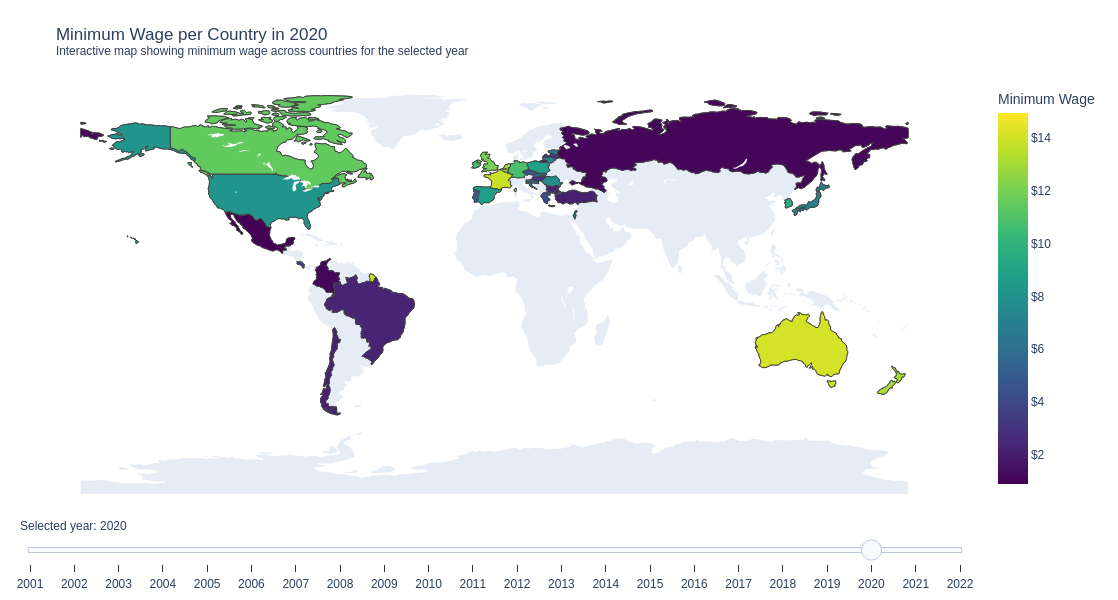

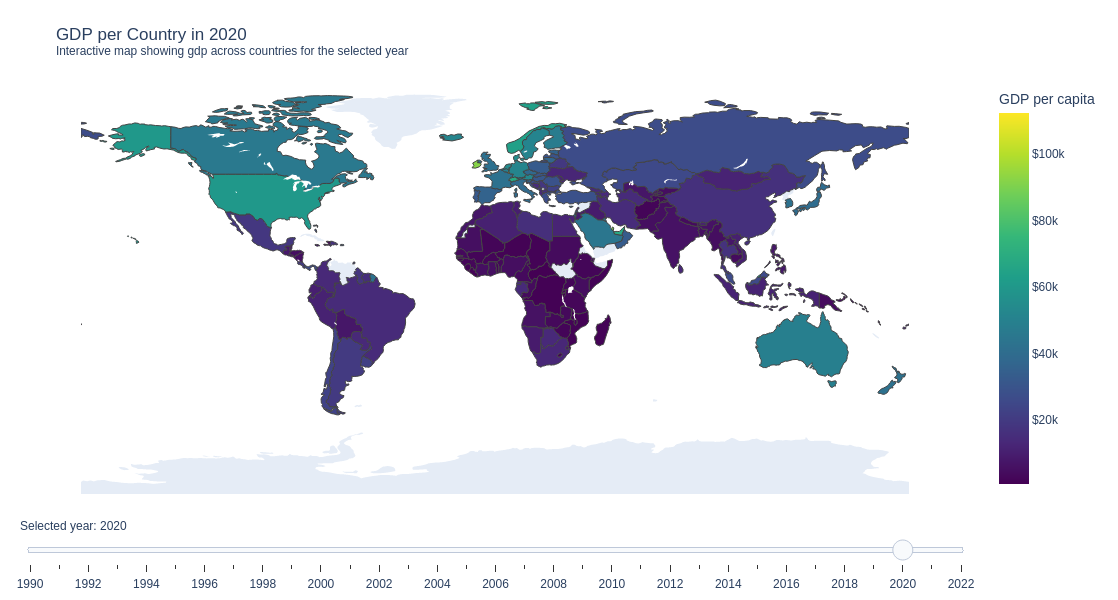

In [13]:
import pandas as pd
import plotly.graph_objects as go

# Load the minimum wage data
df_minimum_wage = pd.read_csv('minimum_wage_worldwide.csv')

# Filter the data for the year 2020
df_minimum_wage_2020 = df_minimum_wage[df_minimum_wage['TIME_PERIOD'] == 2020]

# Load the GDP per capita data
df_gdp = pd.read_csv('gdp-per-capita-worldbank.csv')

# Function to create the plot title
def make_title(year: int, measure: str) -> str:
    return f'{measure} per Country in {year}' + \
           '<br><sup>Interactive map showing ' + measure.lower() + ' across countries for the selected year</sup>'

# Gather unique years in the minimum wage dataset and sort them
minimum_wage_years = sorted(df_minimum_wage['TIME_PERIOD'].unique())

# Create traces (maps with data) for each year for minimum wage
minimum_wage_traces = []
for i, year in enumerate(minimum_wage_years):
    df_minimum_wage_year = df_minimum_wage[df_minimum_wage['TIME_PERIOD'] == year]
    minimum_wage_trace = go.Choropleth(
        locations=df_minimum_wage_year['REF_AREA'],
        locationmode='ISO-3',
        z=df_minimum_wage_year['OBS_VALUE'],
        colorscale='Viridis',
        hovertemplate='<b>%{location}</b><br>Minimum wage: %{z}<extra></extra>',
        visible=(True if year == 2020 else False),  # make trace for 2020 visible by default
        colorbar=go.choropleth.ColorBar(
            title='Minimum Wage',
            tickprefix='$'
        ),
    )
    minimum_wage_traces.append(minimum_wage_trace)

# Gather unique years in the GDP dataset and sort them
gdp_years = sorted(df_gdp['Year'].unique())

# Create traces (maps with data) for each year for GDP
gdp_traces = []
for i, year in enumerate(gdp_years):
    df_gdp_year = df_gdp[df_gdp['Year'] == year]
    gdp_trace = go.Choropleth(
        locations=df_gdp_year['Code'],
        z=df_gdp_year["GDP per capita, PPP (constant 2017 international $)"],
        text=df_gdp_year['Entity'],
        colorscale='Viridis',  # Using the same color scale as minimum wage
        hovertemplate='<b>%{text}</b><br>GDP per capita: %{z}<extra></extra>',
        visible=(True if year == 2020 else False),  # make trace for 2020 visible by default
        colorbar=go.choropleth.ColorBar(
            title='GDP per capita',
            tickprefix='$'
        ),
    )
    gdp_traces.append(gdp_trace)

# Create the slider steps for minimum wage data
minimum_wage_slider_steps = []
for i, year in enumerate(minimum_wage_years):
    minimum_wage_slider_steps.append({
        'method': 'update',
        'args': [
            {'visible': [i == j for j in range(len(minimum_wage_traces))]},
            {'title': make_title(year, 'Minimum Wage')}
        ],
        'label': str(year)
    })

# Create the slider steps for GDP data
gdp_slider_steps = []
for i, year in enumerate(gdp_years):
    gdp_slider_steps.append({
        'method': 'update',
        'args': [
            {'visible': [i == j for j in range(len(gdp_traces))]},
            {'title': make_title(year, 'GDP')}
        ],
        'label': str(year)
    })

# Create the figure for minimum wage
fig_minimum_wage = go.Figure(
    data=minimum_wage_traces,
    layout=go.Layout(
        width=600,
        height=600,
        title=make_title(2020, 'Minimum Wage'),
        geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
        sliders=[{
            'active': minimum_wage_years.index(2020),
            'currentvalue': {'prefix': 'Selected year: '},
            'steps': minimum_wage_slider_steps
        }],
        margin={'t': 80, 'r': 20, 'b': 80, 'l': 20}
    )
)

# Create the figure for GDP per capita
fig_gdp = go.Figure(
    data=gdp_traces,
    layout=go.Layout(
        width=600,
        height=600,
        title=make_title(2020, 'GDP'),
        geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
        sliders=[{
            'active': gdp_years.index(2020),
            'currentvalue': {'prefix': 'Selected year: '},
            'steps': gdp_slider_steps
        }],
        margin={'t': 80, 'r': 20, 'b': 80, 'l': 20}
    )
)

# Show both figures side by side
fig_minimum_wage.show()
fig_gdp.show()


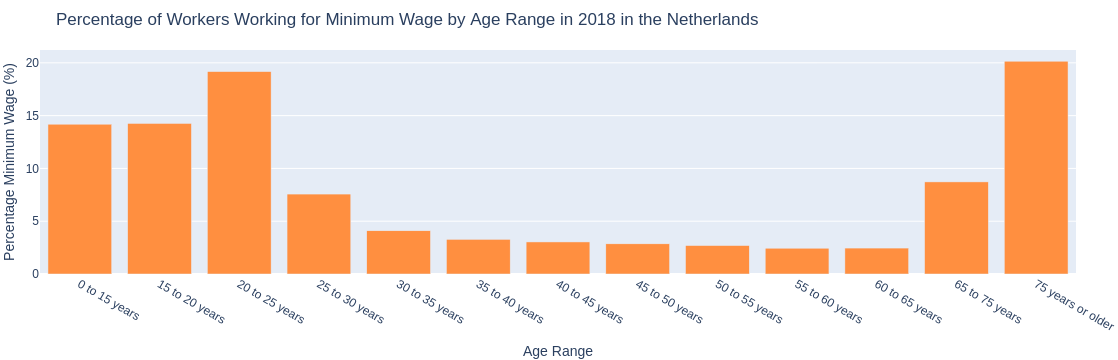

In [19]:
import pandas as pd
import plotly.express as px

# Read the data
data = pd.read_csv('minimumloon_werknemers.csv')

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Create the bar chart using Plotly
fig = px.bar(
    df,
    x="age",
    y="percentage_minimum_wage",
    title="Percentage of Workers Working for Minimum Wage by Age Range in 2018 in the Netherlands",
    labels={"percentage_minimum_wage": "Percentage Minimum Wage (%)", "Age Range": "Age Range"}
)

# Update the bar chart to remove the legend and set all bars to the same color
fig.update_traces(marker_color='#ff8f40', showlegend=False)

# Update layout for better presentation
fig.update_layout(
    xaxis_title='Age Range',
    yaxis_title='Percentage Minimum Wage (%)',
    title="Percentage of Workers Working for Minimum Wage by Age Range in 2018 in the Netherlands",
    margin=dict(l=0, r=0, t=50, b=0)
)

# Show the plot
fig.show()

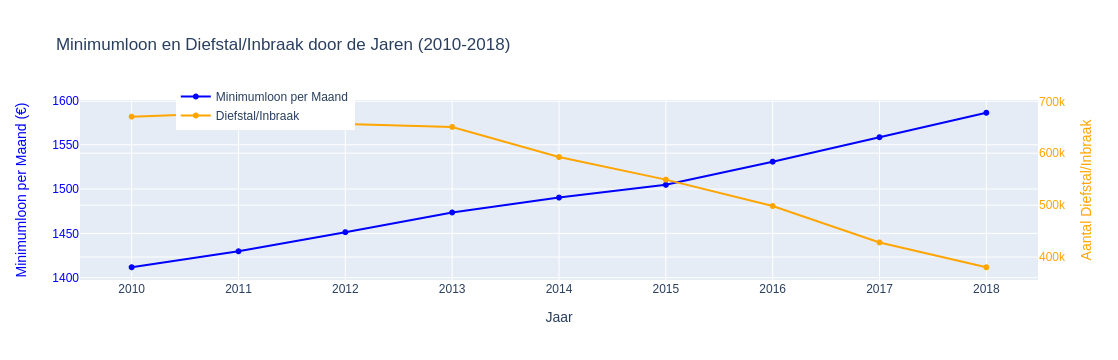

In [15]:
import plotly.graph_objects as go

jaren = list(range(2010, 2019))
diefstal_inbraak = [670470, 677970, 656450, 650650, 592590, 549105, 498285, 428135, 380320]
min_wage_month = [1411.8, 1429.8, 1451.4, 1473.6, 1490.4, 1504.8, 1530.9, 1558.5, 1586.1]

fig = go.Figure()

fig.add_trace(go.Scatter(x=jaren, y=min_wage_month, mode='lines+markers', name='Minimumloon per Maand', line=dict(color='blue')))

fig.add_trace(go.Scatter(x=jaren, y=diefstal_inbraak, mode='lines+markers', name='Diefstal/Inbraak', line=dict(color='orange'), yaxis='y2'))

fig.update_layout(
yaxis=dict(
title='Minimumloon per Maand (€)',
titlefont=dict(color='blue'),
tickfont=dict(color='blue')
),
yaxis2=dict(
title='Aantal Diefstal/Inbraak',
titlefont=dict(color='orange'),
tickfont=dict(color='orange'),
overlaying='y',
side='right'
),
title='Minimumloon en Diefstal/Inbraak door de Jaren (2010-2018)',
xaxis_title='Jaar',
legend=dict(x=0.1, y=1.1)
)

fig.show()

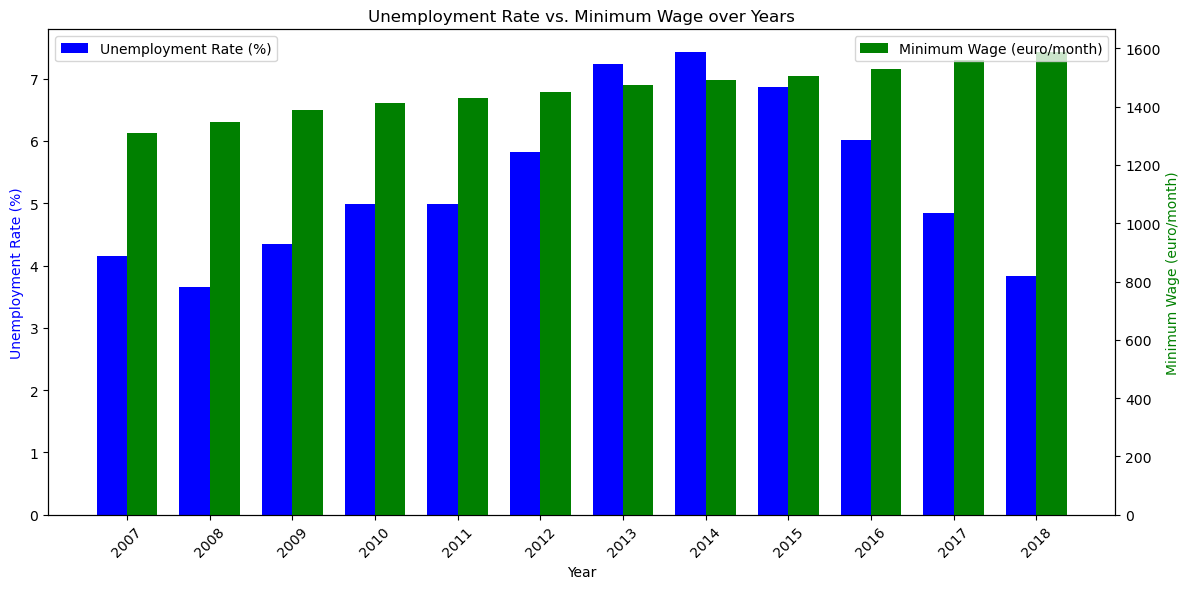

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
minimum_wage_df = pd.read_csv("minimum_wage_data.csv")
consumer_spending_df = pd.read_csv("netherlands-unemployment-rate.csv")

# Convert 'year' column to integers in both datasets
minimum_wage_df['year'] = minimum_wage_df['year'].astype(int)
consumer_spending_df['year'] = consumer_spending_df['year'].astype(int)

# Merge the datasets on 'year'
merged_df = pd.merge(consumer_spending_df, minimum_wage_df, on='year')

# Filter data from 2007 onwards
merged_df = merged_df[merged_df['year'] >= 2007]

# Prepare the data for plotting
years = merged_df['year']
unemployment_rate = merged_df[' Unemployment Rate (%)']
minimum_wage = merged_df['minimum wage per month (euro)']

# Plotting the dual-axis bar graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Position of bars on x-axis
bar_width = 0.55
index = np.arange(len(years)) * 1.5  # Increase the spacing between groups of bars

# Plotting the bars for unemployment rate
bar1 = ax1.bar(index - bar_width/2, unemployment_rate, bar_width, label='Unemployment Rate (%)', color='b')

# Create a second y-axis
ax2 = ax1.twinx()

# Plotting the bars for minimum wage
bar2 = ax2.bar(index + bar_width/2, minimum_wage, bar_width, label='Minimum Wage (euro/month)', color='g')

# Adding labels, title, and customizing
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate (%)', color='b')
ax2.set_ylabel('Minimum Wage (euro/month)', color='g')
ax1.set_title('Unemployment Rate vs. Minimum Wage over Years')
ax1.set_xticks(index)
ax1.set_xticklabels(years, rotation=45)

# Adjust legend positions
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust layout for better fit
fig.tight_layout()
plt.show()
